In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.8/138.8 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 8.1 MB/s eta 0:00:00


In [3]:
!pip install brotlicffi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 9.4 MB/s eta 0:00:00


In [4]:
#Import downloaded modules
import py7zr
import brotlicffi as brotli
import tarfile

In [5]:
!pwd

/content


In [6]:
with py7zr.SevenZipFile(f"/content/drive/My Drive/Gitlab/Africa_1km_Population.7z",mode="r") as z:
  z.extractall("/content/Africa_1km_Population")

In [7]:

import os

extracted_folder = "/content/Africa_1km_Population"
extracted_data = os.listdir(extracted_folder)
num_items = len(extracted_data)

print("Number of items in the extracted folder:", num_items)

Number of items in the extracted folder: 23


In [8]:



print("Contents of the extracted folder:")
for item in extracted_data:
    print(item)

Contents of the extracted folder:
AFR_PPP_2010_adj_v2.tif.xml
AFR_PPP_2005_adj_v2.tif.xml
READ_ME.txt
AFR_PPP_2020_adj_v2.tif.aux.xml
AFR_PPP_2020_adj_v2.tfw
AFR_PPP_2000_adj_v2.tif.aux.xml
AFR_PPP_2020_adj_v2.tif
AFR_PPP_2000_adj_v2.tif
AFR_PPP_2020_adj_v2.tif.xml
AFR_PPP_2015_adj_v2.tif.xml
AFR_PPP_2005_adj_v2.tif.aux.xml
AFR_PPP_2010_adj_v2.tif.aux.xml
AFR_PPP_2005_adj_v2.tfw
AFR_PPP_2005_adj_v2.tif
WP_Africa_Continental_Population_Dataset_data_provenance.csv
AFR_PPP_2000_adj_v2.tif.xml
AFR_PPP_2015_adj_v2.tif.aux.xml
AFR_PPP_2000_adj_v2.tfw
README.txt
AFR_PPP_2010_adj_v2.tfw
AFR_PPP_2015_adj_v2.tif
AFR_PPP_2010_adj_v2.tif
AFR_PPP_2015_adj_v2.tfw


In [9]:

import os
import shutil

source_folder = "/content/Africa_1km_Population"  # Replace with your actual source folder
destination_folder = "/content/my_destination_folder"  # Specify your desired destination folder

formats_to_extract = [".tfw", ".tif", ".tif.xml", ".tif.aux.xml"]

# Creating the destination folder
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

for item in os.listdir(source_folder):
    item_extension = os.path.splitext(item)[-1].lower()
    if item_extension in formats_to_extract:
        source_path = os.path.join(source_folder, item)
        destination_path = os.path.join(destination_folder, item)
        if not os.path.exists(destination_path):
            shutil.copy(source_path, destination_path)

In [10]:

destination_folder = "/content/my_destination_folder"  # Specify your destination folder

# List the contents of the destination folder
destination_contents = os.listdir(destination_folder)

print("Contents of the destination folder:")
for item in destination_contents:
    print(item)

Contents of the destination folder:
AFR_PPP_2020_adj_v2.tfw
AFR_PPP_2020_adj_v2.tif
AFR_PPP_2000_adj_v2.tif
AFR_PPP_2005_adj_v2.tfw
AFR_PPP_2005_adj_v2.tif
AFR_PPP_2000_adj_v2.tfw
AFR_PPP_2010_adj_v2.tfw
AFR_PPP_2015_adj_v2.tif
AFR_PPP_2010_adj_v2.tif
AFR_PPP_2015_adj_v2.tfw


In [11]:
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 24.0 MB/s eta 0:00:00


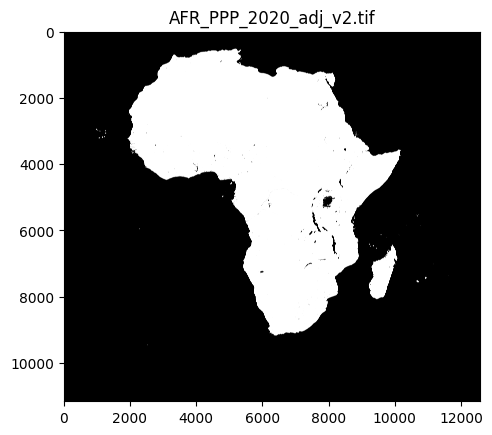

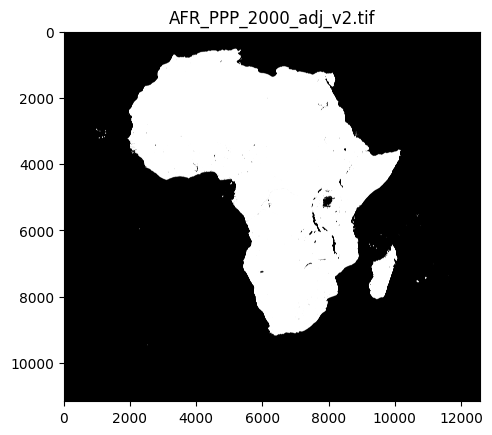

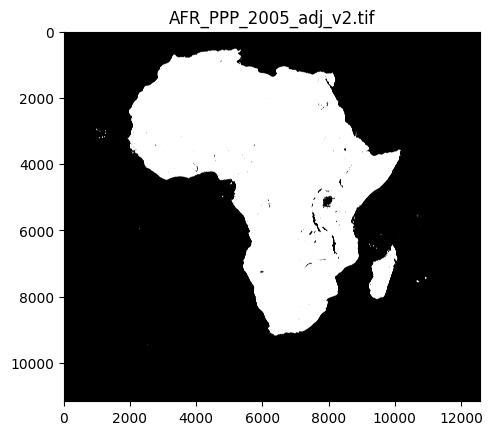

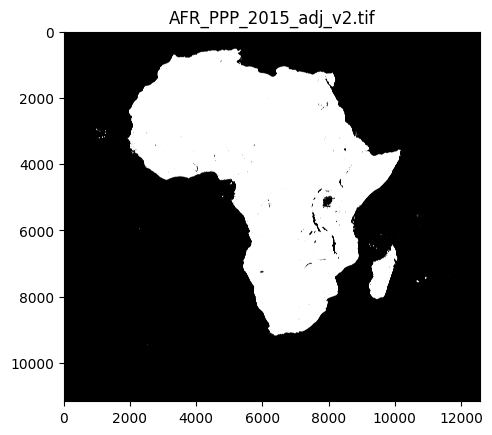

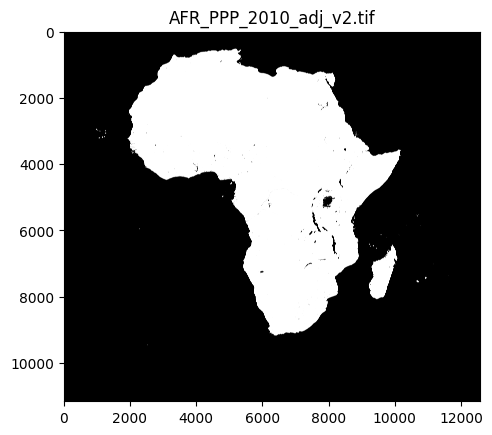

In [12]:

import os
import matplotlib.pyplot as plt
import rasterio

# Path to the destination folder
destination_folder = "/content/my_destination_folder"

# List the contents of the destination folder
destination_contents = os.listdir(destination_folder)

# Filter TIF files
tif_files = [item for item in destination_contents if item.lower().endswith(".tif")]

# Display TIF images
for tif_file in tif_files:
    tif_path = os.path.join(destination_folder, tif_file)
    with rasterio.open(tif_path) as dataset:
        plt.imshow(dataset.read(1), cmap='gray')  # Display the first band
        plt.title(tif_file)
        plt.show()

In [13]:
#Let us load the other datasets
import numpy as np
import pandas as pd
import seaborn as sns

In [267]:
df_original = pd.read_csv('/content/drive/My Drive/Gitlab/DatasetAfricaMalaria.csv')
df_iptp = pd.read_excel('/content/drive/My Drive/Gitlab/Child-Health-Coverage-Database-May-2022 (3).xlsx', sheet_name = "IPTP")
df_itn = pd.read_excel('/content/drive/My Drive/Gitlab/Child-Health-Coverage-Database-May-2022 (3).xlsx', sheet_name = "ITN")
df_total_pop = pd.read_csv('/content/drive/My Drive/Gitlab/API_SP.POP.TOTL_DS2_en_csv_v2_5695140.csv', skiprows = 4)
df_rural_pop = pd.read_csv('/content/drive/My Drive/Gitlab/API_SP.RUR.TOTL_DS2_en_csv_v2_5729083.csv', skiprows = 4)
df_urban_pop = pd.read_csv('/content/drive/My Drive/Gitlab/API_SP.URB.TOTL_DS2_en_csv_v2_5729081.csv', skiprows = 4)
df_malaria_icd = pd.read_csv('/content/drive/My Drive/Gitlab/data (6).csv', skiprows = 1)
df_malaria_death = pd.read_csv('/content/drive/My Drive/Gitlab/data (3).csv')
df_confirmed_cases = pd.read_csv('/content/drive/My Drive/Gitlab/data (2).csv', skiprows = 1)

In [268]:
#let us inspect the original dataset
df_original.head()

,Country Name,Year,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),People using safely managed drinking water services (% of population),"People using safely managed drinking water services, rural (% of rural population)",...,Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry
0,Algeria,2007,DZA,0.01,26.0,NaN,NaN,NaN,NaN,NaN,...,2.71,91.68,85.83,94.78,85.85,76.94,90.57,28.033886,1.659626,POINT (28.033886 1.659626)
1,Angola,2007,AGO,286.72,1533485.0,18.0,29.8,1.5,NaN,NaN,...,5.01,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887)
2,Benin,2007,BEN,480.24,0.0,NaN,NaN,NaN,NaN,NaN,...,4.09,63.78,54.92,76.24,11.80,4.29,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834)
3,Botswana,2007,BWA,1.03,390.0,NaN,NaN,NaN,NaN,NaN,...,4.80,78.89,57.60,94.35,61.60,39.99,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866)
4,Burkina Faso,2007,BFA,503.80,44246.0,NaN,NaN,NaN,NaN,NaN,...,5.91,52.27,45.13,76.15,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593)


In [269]:
df_original.isnull().sum()

Country Name                                                                                 0
Year                                                                                         0
Country Code                                                                                 0
Incidence of malaria (per 1,000 population at risk)                                         44
Malaria cases reported                                                                      44
Use of insecticide-treated bed nets (% of under-5 population)                              462
Children with fever receiving antimalarial drugs (% of children under age 5 with fever)    472
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)      488
People using safely managed drinking water services (% of population)                      495
People using safely managed drinking water services, rural (% of rural population)         506
People using safely managed drinking water service

# Data wrangling, transformation and joining

In [270]:
#let us prepare each of the dataset for merging
df_iptp.head()

,ISO,Country Name,UNICEF Reporting Region,UNICEF Programme Region,World Bank Income Group (2020),Year,Short Source,Long Source,National,Rural,Urban,Poorest,Second,Middle,Fourth,Richest,None,Primary,Sec & Higher
0,AGO,Angola,Eastern and Southern Africa,ESARO,Lower middle income,2016,DHS 2015-2016,Demographic and Health Survey 2015-2016,19.0,11.3,24.0,8.3,15.4,21.9,23.3,31.3,13.1,17.0,26.2
1,BDI,Burundi,Eastern and Southern Africa,ESARO,Low income,2010,DHS 2010,Demographic and Health Survey 2010,0.1,0.1,0.1,NaN,NaN,NaN,NaN,0.5,NaN,0.2,0.1
2,BDI,Burundi,Eastern and Southern Africa,ESARO,Low income,2017,DHS 2016-2017,Demographic and Health Survey 2016-2017,12.6,13.3,6.3,15.2,14.9,13.8,10.6,6.9,NaN,NaN,NaN
3,BEN,Benin,West and Central Africa,WCARO,Lower middle income,2012,DHS 2011-2012,Demographic and Health Survey 2011-2012,8.8,7.2,11.1,5.8,6.3,9.5,8.2,14.3,7.7,10.3,12.7
4,BEN,Benin,West and Central Africa,WCARO,Lower middle income,2014,MICS 2014,Multiple Indicator Cluster Survey 2014,12.5,12.1,13.0,8.8,11.5,14.0,13.3,14.3,12.5,11.9,14.8


In [271]:
df_iptp.describe()

,Year,National,Rural,Urban,Poorest,Second,Middle,Fourth,Richest,None,Primary,Sec & Higher
count,139.000000,137.000000,137.000000,137.000000,132.000000,132.000000,133.000000,131.000000,135.000000,99.000000,101.000000,101.000000
mean,2013.172662,17.673723,16.885401,19.617518,15.441667,16.520455,17.490226,18.939695,20.107407,13.953535,15.483168,17.852475
std,4.552318,15.404780,14.756591,16.714285,14.134501,14.603554,15.256707,16.046584,17.560291,13.064232,13.227895,15.809039
min,2003.000000,0.100000,0.100000,0.100000,0.500000,0.300000,0.200000,0.300000,0.100000,0.600000,0.200000,0.100000
25%,2010.000000,6.000000,5.600000,6.000000,4.975000,5.550000,5.900000,6.000000,6.400000,4.250000,5.900000,6.600000
50%,2014.000000,13.200000,12.000000,14.900000,11.150000,12.100000,13.600000,14.000000,14.900000,9.900000,10.800000,13.100000
75%,2017.000000,24.400000,24.500000,27.000000,21.050000,22.175000,24.600000,27.150000,28.400000,19.100000,20.600000,22.900000
max,2021.000000,67.300000,67.000000,67.800000,59.600000,62.400000,71.900000,73.500000,70.900000,64.300000,56.300000,79.200000


In [272]:
df_iptp.dtypes

ISO                                object
Country Name                       object
UNICEF Reporting Region            object
UNICEF Programme Region            object
World Bank Income Group (2020)     object
Year                                int64
Short Source                       object
Long Source                        object
National                          float64
Rural                             float64
Urban                             float64
Poorest                           float64
Second                            float64
Middle                            float64
Fourth                            float64
Richest                           float64
None                              float64
Primary                           float64
Sec & Higher                      float64
dtype: object

In [273]:

# Let's compute the means for each column
columns_to_compute = df_iptp.iloc[:, 8:19]
column_means = columns_to_compute.mean(axis = 1, skipna = True)

# Add the column mean values to the DataFrame
df_iptp = df_iptp.assign(ColMean=column_means)

In [274]:
df_iptp.head()

,ISO,Country Name,UNICEF Reporting Region,UNICEF Programme Region,World Bank Income Group (2020),Year,Short Source,Long Source,National,Rural,Urban,Poorest,Second,Middle,Fourth,Richest,None,Primary,Sec & Higher,ColMean
0,AGO,Angola,Eastern and Southern Africa,ESARO,Lower middle income,2016,DHS 2015-2016,Demographic and Health Survey 2015-2016,19.0,11.3,24.0,8.3,15.4,21.9,23.3,31.3,13.1,17.0,26.2,19.163636
1,BDI,Burundi,Eastern and Southern Africa,ESARO,Low income,2010,DHS 2010,Demographic and Health Survey 2010,0.1,0.1,0.1,NaN,NaN,NaN,NaN,0.5,NaN,0.2,0.1,0.183333
2,BDI,Burundi,Eastern and Southern Africa,ESARO,Low income,2017,DHS 2016-2017,Demographic and Health Survey 2016-2017,12.6,13.3,6.3,15.2,14.9,13.8,10.6,6.9,NaN,NaN,NaN,11.700000
3,BEN,Benin,West and Central Africa,WCARO,Lower middle income,2012,DHS 2011-2012,Demographic and Health Survey 2011-2012,8.8,7.2,11.1,5.8,6.3,9.5,8.2,14.3,7.7,10.3,12.7,9.263636
4,BEN,Benin,West and Central Africa,WCARO,Lower middle income,2014,MICS 2014,Multiple Indicator Cluster Survey 2014,12.5,12.1,13.0,8.8,11.5,14.0,13.3,14.3,12.5,11.9,14.8,12.609091


In [275]:

#creating a function to drop columns
def drop_columns_by_indices(dataframe, start_idx, end_idx):
    columns_to_drop = dataframe.columns[start_idx:end_idx+1]
    dataframe.drop(columns=columns_to_drop, inplace=True)

# Call the function to drop columns
drop_columns_by_indices(df_iptp, start_idx=8, end_idx=18)

In [276]:
df_iptp.head()

,ISO,Country Name,UNICEF Reporting Region,UNICEF Programme Region,World Bank Income Group (2020),Year,Short Source,Long Source,ColMean
0,AGO,Angola,Eastern and Southern Africa,ESARO,Lower middle income,2016,DHS 2015-2016,Demographic and Health Survey 2015-2016,19.163636
1,BDI,Burundi,Eastern and Southern Africa,ESARO,Low income,2010,DHS 2010,Demographic and Health Survey 2010,0.183333
2,BDI,Burundi,Eastern and Southern Africa,ESARO,Low income,2017,DHS 2016-2017,Demographic and Health Survey 2016-2017,11.700000
3,BEN,Benin,West and Central Africa,WCARO,Lower middle income,2012,DHS 2011-2012,Demographic and Health Survey 2011-2012,9.263636
4,BEN,Benin,West and Central Africa,WCARO,Lower middle income,2014,MICS 2014,Multiple Indicator Cluster Survey 2014,12.609091


In [277]:

# Rename a column
df_iptp.rename(columns={'ColMean': 'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)'}, inplace=True)
# dropping other irrelevant columns
df_iptp = df_iptp.drop(columns = ['ISO', 'UNICEF Reporting Region', 'UNICEF Programme Region', 'World Bank Income Group (2020)', 'Short Source', 'Long Source'], axis = 1)

In [278]:
df_iptp.head(2)

,Country Name,Year,Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)
0,Angola,2016,19.163636
1,Burundi,2010,0.183333


In [279]:
#let us load some the othee IPTP dataset
df_iptp3 = pd.read_csv('/content/drive/My Drive/Gitlab/data (5).csv', skiprows = 1, index_col = 0)

In [280]:
df_iptp3.head()

,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010
"Countries, territories and areas",,,,,,,,,,,
Angola,15.0,16.2,13.4,8.6,7.0,12.9,4.6,0.0,0.0,0.0,0.0
Benin,32.6,34.0,27.3,11.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Burkina Faso,52.4,58.8,58.0,41.4,51.0,38.5,14.8,0.0,0.0,0.0,0.0
Burundi,44.5,64.6,60.2,52.6,47.2,41.2,35.2,0.0,0.0,0.0,0.0
Cameroon,24.7,32.0,26.0,23.5,19.3,17.7,15.1,15.6,14.5,0.0,0.0


In [281]:
df_iptp3.index

Index(['Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon',
       'Central African Republic', 'Chad', 'Congo', 'Côte d'Ivoire',
       'Democratic Republic of the Congo', 'Equatorial Guinea', 'Gabon',
       'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Liberia',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Niger',
       'Nigeria', 'Senegal', 'Sierra Leone', 'South Sudan', 'Togo', 'Uganda',
       'United Republic of Tanzania', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Countries, territories and areas')

In [282]:


# Reset the index and move it to a column
df_iptp3 = df_iptp3.reset_index()

In [283]:

# Rename a column
df_iptp3.rename(columns={'Countries, territories and areas': 'Country Name'}, inplace=True)

In [284]:
df_iptp3.head()

,Country Name,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010
0,Angola,15.0,16.2,13.4,8.6,7.0,12.9,4.6,0.0,0.0,0.0,0.0
1,Benin,32.6,34.0,27.3,11.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Burkina Faso,52.4,58.8,58.0,41.4,51.0,38.5,14.8,0.0,0.0,0.0,0.0
3,Burundi,44.5,64.6,60.2,52.6,47.2,41.2,35.2,0.0,0.0,0.0,0.0
4,Cameroon,24.7,32.0,26.0,23.5,19.3,17.7,15.1,15.6,14.5,0.0,0.0


In [285]:

# Convert multiple columns to rows using the melt function
df_iptp3 = pd.melt(df_iptp3, id_vars= ['Country Name'], var_name='Year', value_name='Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)')

In [286]:
df_iptp3

,Country Name,Year,Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)
0,Angola,2020,15.0
1,Benin,2020,32.6
2,Burkina Faso,2020,52.4
3,Burundi,2020,44.5
4,Cameroon,2020,24.7
...,...,...,...
358,Togo,2010,0.0
359,Uganda,2010,7.4
360,United Republic of Tanzania,2010,2.7
361,Zambia,2010,0.0


In [287]:
df_iptp['Year'] = pd.to_datetime(df_iptp['Year'], format='%Y')
df_iptp3['Year'] = pd.to_datetime(df_iptp3['Year'], format = '%Y')

In [288]:
df_iptp_concat = pd.concat([df_iptp, df_iptp3], axis = 0, join = 'outer')

In [289]:
df_iptp_concat.head(140)

,Country Name,Year,Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)
0,Angola,2016-01-01,19.163636
1,Burundi,2010-01-01,0.183333
2,Burundi,2017-01-01,11.700000
3,Benin,2012-01-01,9.263636
4,Benin,2014-01-01,12.609091
...,...,...,...
135,Zimbabwe,2009-01-01,6.727273
136,Zimbabwe,2011-01-01,5.336364
137,Zimbabwe,2014-01-01,7.090909
138,Zimbabwe,2019-01-01,11.837500


In [290]:
df_iptp_concat = df_iptp_concat.sort_values(by = 'Country Name')
df_iptp_concat.head()

,Country Name,Year,Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)
0,Angola,2016-01-01,19.163636
66,Angola,2018-01-01,13.400000
0,Angola,2020-01-01,15.000000
99,Angola,2017-01-01,8.600000
132,Angola,2016-01-01,7.000000


In [291]:

# Reset the index to be uniform
df_iptp_concat.reset_index(drop = True, inplace = True)
df_iptp_concat.head(30)

,Country Name,Year,Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)
0,Angola,2016-01-01,19.163636
1,Angola,2018-01-01,13.400000
2,Angola,2020-01-01,15.000000
3,Angola,2017-01-01,8.600000
4,Angola,2016-01-01,7.000000
5,Angola,2015-01-01,12.900000
6,Angola,2014-01-01,4.600000
7,Angola,2013-01-01,0.000000
8,Angola,2012-01-01,0.000000
9,Angola,2011-01-01,0.000000


Let us move ahead to ITN

In [292]:

df_itn = pd.read_excel('/content/drive/My Drive/Gitlab/Child-Health-Coverage-Database-May-2022 (3).xlsx', sheet_name = "ITN")
df_itn2 = pd.read_excel('/content/drive/My Drive/Gitlab/Child-Health-Coverage-Database-May-2022 (3).xlsx', sheet_name = "ITN2")
df_itnown = pd.read_excel('/content/drive/My Drive/Gitlab/Child-Health-Coverage-Database-May-2022 (3).xlsx', sheet_name = "ITNOWN")

In [293]:

import pandas as pd

def compute_column_means(dataframe, start_column, end_column):
    # Select the columns for computation
    columns_to_compute = dataframe.iloc[:, start_column:end_column]

    # Compute the mean for each row (horizontally)
    row_means = columns_to_compute.mean(axis=1, skipna=True)

    # Add the row mean values to the DataFrame
    dataframe['ColMean'] = row_means

    return dataframe

def drop_columns_by_indices(dataframe, start_idx, end_idx):
    columns_to_drop = dataframe.columns[start_idx:end_idx+1]
    dataframe.drop(columns=columns_to_drop, inplace=True)

def preprocess_dataframe(dataframe):
    # Rename a column
    dataframe.rename(columns={'ColMean': 'Use of insecticide-treated bed nets (% of under-5 population)'}, inplace=True)
    dataframe.rename(columns = {'Countries and areas': 'Country Name'}, inplace = True)

    # Drop irrelevant columns
    columns_to_drop = ['ISO', 'UNICEF Reporting Region', 'UNICEF Programme Region', 'World Bank Income Group (2020)', 'Short Source', 'Long Source']
    dataframe = dataframe.drop(columns=columns_to_drop, axis=1)

    # Convert year to datetime
    dataframe['Year'] = pd.to_datetime(dataframe['Year'], format='%Y')

    return dataframe

In [294]:
df_itn = compute_column_means(df_itn, 8, 18)

In [295]:
drop_columns_by_indices(df_itn, 8, 17)

In [296]:
df_itn = preprocess_dataframe(df_itn)

In [297]:
df_itn

,Country Name,Year,Use of insecticide-treated bed nets (% of under-5 population)
0,Afghanistan,2015-01-01,4.762500
1,Angola,2007-01-01,17.600000
2,Angola,2011-01-01,24.920000
3,Angola,2016-01-01,21.650000
4,Azerbaijan,2000-01-01,1.555556
...,...,...,...
247,Zimbabwe,2009-01-01,17.290000
248,Zimbabwe,2011-01-01,9.790000
249,Zimbabwe,2014-01-01,25.950000
250,Zimbabwe,2015-01-01,8.870000


In [298]:
df_itn.isnull().sum()

Country Name                                                     0
Year                                                             0
Use of insecticide-treated bed nets (% of under-5 population)    0
dtype: int64

ITN2

In [299]:
df_itn2 = compute_column_means(df_itn2, 8, 16)

In [300]:
drop_columns_by_indices(df_itn2, 8, 15)

In [301]:
df_itn2 = preprocess_dataframe(df_itn2)

In [302]:
df_itn2

,Country Name,Year,Use of insecticide-treated bed nets (% of under-5 population)
0,Afghanistan,2015-01-01,2.8125
1,Angola,2016-01-01,12.4500
2,Burundi,2010-01-01,22.9375
3,Burundi,2012-01-01,29.3000
4,Benin,2012-01-01,45.6250
...,...,...,...
95,Zambia,2019-01-01,40.9250
96,Zimbabwe,2011-01-01,23.5500
97,Zimbabwe,2014-01-01,33.3750
98,Zimbabwe,2015-01-01,38.6125


ITNOWN

In [303]:
df_itnown = compute_column_means(df_itnown, 8, 16)

In [304]:
drop_columns_by_indices(df_itnown, 8, 15)

In [305]:
df_itnown = preprocess_dataframe(df_itnown)

In [306]:
df_itnown

,Country Name,Year,Use of insecticide-treated bed nets (% of under-5 population)
0,Afghanistan,2015-01-01,25.3625
1,Angola,2007-01-01,28.0000
2,Angola,2011-01-01,32.7125
3,Angola,2016-01-01,30.8250
4,Burundi,2005-01-01,11.1250
...,...,...,...
220,Zimbabwe,2009-01-01,27.3375
221,Zimbabwe,2011-01-01,28.5625
222,Zimbabwe,2014-01-01,41.9000
223,Zimbabwe,2015-01-01,47.2750


In [307]:
#Now that we have wrangled the ITN datasets, let us join them

In [308]:
df_itn_concat = pd.concat([df_itn, df_itn2, df_itnown], axis = 0, join = 'outer')

In [309]:
df_itn_concat.head(140)

,Country Name,Year,Use of insecticide-treated bed nets (% of under-5 population)
0,Afghanistan,2015-01-01,4.762500
1,Angola,2007-01-01,17.600000
2,Angola,2011-01-01,24.920000
3,Angola,2016-01-01,21.650000
4,Azerbaijan,2000-01-01,1.555556
...,...,...,...
135,Malawi,2012-01-01,56.070000
136,Malawi,2014-01-01,66.310000
137,Malawi,2016-01-01,44.080000
138,Malawi,2017-01-01,68.100000


In [310]:
df_itn_concat = df_itn_concat.sort_values(by = 'Country Name')
df_itn_concat.head()

,Country Name,Year,Use of insecticide-treated bed nets (% of under-5 population)
0,Afghanistan,2015-01-01,4.7625
0,Afghanistan,2015-01-01,25.3625
0,Afghanistan,2015-01-01,2.8125
3,Angola,2016-01-01,21.6500
2,Angola,2011-01-01,24.9200


In [311]:

# Reset the index to be uniform
df_itn_concat.reset_index(drop = True, inplace = True)
df_itn_concat.head(20)

,Country Name,Year,Use of insecticide-treated bed nets (% of under-5 population)
0,Afghanistan,2015-01-01,4.762500
1,Afghanistan,2015-01-01,25.362500
2,Afghanistan,2015-01-01,2.812500
3,Angola,2016-01-01,21.650000
4,Angola,2011-01-01,24.920000
5,Angola,2016-01-01,12.450000
6,Angola,2016-01-01,30.825000
7,Angola,2011-01-01,32.712500
8,Angola,2007-01-01,28.000000
9,Angola,2007-01-01,17.600000


In [312]:
df_itn_concat = df_itn_concat.drop_duplicates()
df_itn_concat.head(20)

,Country Name,Year,Use of insecticide-treated bed nets (% of under-5 population)
0,Afghanistan,2015-01-01,4.762500
1,Afghanistan,2015-01-01,25.362500
2,Afghanistan,2015-01-01,2.812500
3,Angola,2016-01-01,21.650000
4,Angola,2011-01-01,24.920000
5,Angola,2016-01-01,12.450000
6,Angola,2016-01-01,30.825000
7,Angola,2011-01-01,32.712500
8,Angola,2007-01-01,28.000000
9,Angola,2007-01-01,17.600000


Malaria incident rates

In [313]:
df_malaria_icd.head()

,"Countries, territories and areas",2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007
0,Algeria,0 [0-0],0 [0-0],0 [0-0],0 [0-0],0 [0-0],0 [0-0],0 [0-0],0 [0-0],0 [0-0],0.03 [0.03-0.03],0 [0-0],0 [0-0],0 [0-0],0 [0-0],0.01 [0.01-0.01]
1,Angola,254.87 [168.61-369.13],251.58 [167.27-365.03],227.25 [170.42-295.51],214.25 [164.34-272.39],208.95 [162.27-265.16],189.45 [146.79-239.70],176.68 [135.10-226.54],166.78 [125.92-218.34],160.70 [119.29-212.35],154.22 [115.21-202.49],157.17 [117.27-206.24],172.72 [128.84-227.22],196.81 [148.51-256.05],233.45 [178.10-300.33],274.33 [212.08-348.09]
2,Benin,383.45 [272.48-528.95],378.15 [263.15-519.06],401.71 [309.64-511.84],408.07 [321.84-507.36],420.50 [337.96-513.30],419.33 [340.39-513.69],389.71 [310.78-482.31],369.02 [287.90-464.63],364.12 [282.52-458.93],364.56 [282.66-460.77],380.81 [294.22-485.55],408.96 [320.51-515.93],439.58 [351.63-547.89],469.77 [383.20-573.48],488.01 [399.63-591.61]
3,Botswana,0.62 [0.48-0.86],1.05 [0.73-1.59],0.16 [0.12-0.21],0.50 [0.38-0.68],1.84 [1.42-2.53],0.63 [0.49-0.85],0.30 [0.23-0.40],1.39 [1.07-1.86],0.49 [0.39-0.71],0.21 [0.16-0.29],0.48 [0.37-0.67],1.61 [0.96-2.83],2.00 [0.98-3.77],1.85 [0.90-3.71],0.99 [0.38-2.44]
4,Burkina Faso,376.77 [250.08-545.25],377.40 [249.72-544.48],356.66 [241.68-513.16],357.03 [239.86-509.11],357.61 [247.33-504.35],374.32 [277.61-495.72],419.28 [331.77-522.21],447.61 [359.64-550.40],488.77 [393.59-600.68],535.22 [431.26-656.39],556.66 [449.05-680.24],570.47 [459.11-698.67],570.78 [456.71-699.89],551.82 [444.76-677.37],521.35 [410.95-651.48]


In [314]:
df_malaria_icd.isnull().sum()

Countries, territories and areas    0
2021                                0
2020                                0
2019                                0
2018                                0
2017                                0
2016                                0
2015                                0
2014                                0
2013                                0
2012                                0
2011                                0
2010                                0
2009                                0
2008                                0
2007                                0
dtype: int64

In [315]:
#rename the column name
def preprocess_dataframe(dataframe):
    # Rename a column
    dataframe.rename(columns = {'Countries, territories and areas': 'Country Name'}, inplace = True)
preprocess_dataframe(df_malaria_icd)

In [316]:
#let us melt this dataset
df_malaria_icd = pd.melt(df_malaria_icd, id_vars= ['Country Name'], var_name='Year', value_name='Incidence of malaria (per 1,000 population at risk)')

In [317]:
import re
# Define a function to remove numbers in square brackets
def remove_numbers_in_square_brackets(text):
    if isinstance(text, str):  # Checking if the value is a string
        return re.sub(r'\[.*?\]', '', text)
    else:
        return text

# Apply the function to all columns except the first one
for col in df_malaria_icd.columns:
    if col != 'Countries, territories and areas':
        df_malaria_icd[col] = df_malaria_icd[col].apply(remove_numbers_in_square_brackets)



In [318]:
df_malaria_icd.head(2)

,Country Name,Year,"Incidence of malaria (per 1,000 population at risk)"
0,Algeria,2021,0
1,Angola,2021,254.87


In [319]:
#let convert 'Year' to datetime
df_malaria_icd['Year'] = pd.to_datetime(df_malaria_icd['Year'], format='%Y')

In [320]:
df_malaria_icd.head()

,Country Name,Year,"Incidence of malaria (per 1,000 population at risk)"
0,Algeria,2021-01-01,0
1,Angola,2021-01-01,254.87
2,Benin,2021-01-01,383.45
3,Botswana,2021-01-01,0.62
4,Burkina Faso,2021-01-01,376.77


Confirmed malaria cases

In [321]:
df_confirmed_cases.head()

,"Countries, territories and areas",2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010
0,Algeria,2 726,1 014,1 242,453,432,747,266,603,887,191,408
1,Angola,6 599 327,7 054 978,5 150 575,3 874 892,3 794 253,2 769 305,2 298 979,1 999 868,1 496 834,1 632 282,1 682 870
2,Benin,2 516 465,2 895 878,1 975 812,1 933 912,1 610 790,1 721 626,1 309 238,1 090 602,705 839,422 968,NaN
3,Botswana,953,272,585,1 909,723,332,1 346,456,193,432,1 046
4,Burkina Faso,10 600 340,5 877 426,10 278 970,10 557 260,9 779 411,7 015 446,5 428 655,3 769 051,3 858 046,428 113,804 539


In [322]:
preprocess_dataframe(df_confirmed_cases)

In [323]:
#let us melt this dataset
df_confirmed_cases = pd.melt(df_confirmed_cases, id_vars= ['Country Name'], var_name='Year', value_name='Malaria Confirmed Cases')

In [324]:
#let convert 'Year' to datetime
df_confirmed_cases['Year'] = pd.to_datetime(df_confirmed_cases['Year'], format='%Y')

In [325]:
df_confirmed_cases.head()

,Country Name,Year,Malaria Confirmed Cases
0,Algeria,2020-01-01,2 726
1,Angola,2020-01-01,6 599 327
2,Benin,2020-01-01,2 516 465
3,Botswana,2020-01-01,953
4,Burkina Faso,2020-01-01,10 600 340


Malaria ACT

In [326]:
#loading the MLRACT dataset

df_mlract = pd.read_excel('/content/drive/My Drive/Gitlab/Child-Health-Coverage-Database-May-2022 (3).xlsx', sheet_name = "MLRACT")

In [327]:
df_mlract.head()

,ISO,Countries and areas,UNICEF Reporting Region,UNICEF Programme Region,World Bank Income Group (2020),Year,Short Source,Long Source,National,Male,...,Rural,Urban,Poorest,Second,Middle,Fourth,Richest,None,Primary,Sec & Higher
0,AFG,Afghanistan,South Asia,ROSA,Low income,2015,DHS 2015,Demographic and Health Survey 2015,4.4,5.3,...,6.6,0.2,5.9,11.1,2.2,3.9,NaN,NaN,NaN,NaN
1,AGO,Angola,Eastern and Southern Africa,ESARO,Lower middle income,2007,MIS 2006-2007,Malaria Indicator Survey 2006-2007,5.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AGO,Angola,Eastern and Southern Africa,ESARO,Lower middle income,2011,MIS 2011,Malaria Indicator Survey 2011,21.7,20.8,...,15.2,35.2,6.1,12.0,15.9,26.3,36.0,NaN,NaN,NaN
3,AGO,Angola,Eastern and Southern Africa,ESARO,Lower middle income,2016,DHS 2015-2016,Demographic and Health Survey 2015-2016,76.7,81.6,...,68.7,82.1,62.9,70.9,79.3,78.6,98.1,NaN,NaN,NaN
4,BDI,Burundi,Eastern and Southern Africa,ESARO,Low income,2010,DHS 2010,Demographic and Health Survey 2010,69.5,70.3,...,70.8,42.3,69.7,77.4,68.1,65.6,63.7,NaN,NaN,NaN


In [328]:



def compute_column_means(dataframe, start_column, end_column):
    # Select the columns for computation
    columns_to_compute = dataframe.iloc[:, start_column:end_column]

    # Compute the mean for each row (horizontally)
    row_means = columns_to_compute.mean(axis=1, skipna=True)

    # Add the row mean values to the DataFrame
    dataframe['ColMean'] = row_means

    return dataframe

def drop_columns_by_indices(dataframe, start_idx, end_idx):
    columns_to_drop = dataframe.columns[start_idx:end_idx+1]
    dataframe.drop(columns=columns_to_drop, inplace=True)

def preprocess_dataframe(dataframe):
    # Rename a column
    dataframe.rename(columns={'ColMean': 'Children with fever receiving antimalarial drugs (% of children under age 5 with fever)'}, inplace=True)
    dataframe.rename(columns = {'Countries and areas': 'Country Name'}, inplace = True)

    # Drop irrelevant columns
    columns_to_drop = ['ISO', 'UNICEF Reporting Region', 'UNICEF Programme Region', 'World Bank Income Group (2020)', 'Short Source', 'Long Source', 'Sec & Higher']
    dataframe = dataframe.drop(columns=columns_to_drop, axis=1)

    # Convert year to datetime
    dataframe['Year'] = pd.to_datetime(dataframe['Year'], format='%Y')

    return dataframe

In [329]:
df_mlract = compute_column_means(df_mlract, 8, 16)

In [330]:
#df_mlract.head()

In [331]:
drop_columns_by_indices(df_mlract, 8, 19)

In [332]:
#df_mlract.head()

In [333]:
df_mlract = preprocess_dataframe(df_mlract)

In [334]:
df_mlract.head()

,Country Name,Year,Children with fever receiving antimalarial drugs (% of children under age 5 with fever)
0,Afghanistan,2015-01-01,4.9125
1,Angola,2007-01-01,5.5000
2,Angola,2011-01-01,18.6750
3,Angola,2016-01-01,73.8625
4,Burundi,2010-01-01,67.0625


 # Filling for missing values using information from new datasets

In [352]:
working_df = df_original.copy()

In [353]:
len(working_df)

594

In [354]:
# Convert year to datetime
working_df['Year'] = pd.to_datetime(working_df['Year'], format='%Y')

In [355]:
working_df.tail()

,Country Name,Year,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),People using safely managed drinking water services (% of population),"People using safely managed drinking water services, rural (% of rural population)",...,Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry
589,Togo,2017-01-01,TGO,278.20,1755577.0,69.7,31.1,41.7,NaN,NaN,...,3.79,65.13,48.39,89.06,16.13,7.40,28.61,8.619543,0.824782,POINT (8.619543 0.824782)
590,Tunisia,2017-01-01,TUN,NaN,NaN,NaN,NaN,NaN,92.66,NaN,...,1.57,96.25,88.71,99.70,90.92,81.35,95.29,33.886917,9.537499,POINT (33.886917 9.537499)
591,Uganda,2017-01-01,UGA,336.76,11667831.0,NaN,NaN,NaN,7.07,4.46,...,6.25,49.10,41.25,75.11,18.47,16.17,26.11,1.373333,32.290275,POINT (1.373333 32.290275)
592,Zambia,2017-01-01,ZMB,160.05,5505639.0,NaN,NaN,NaN,NaN,NaN,...,4.21,59.96,41.95,83.86,26.37,18.93,36.24,-13.133897,27.849332,POINT (-13.133897 27.849332)
593,Zimbabwe,2017-01-01,ZWE,108.55,467508.0,NaN,NaN,NaN,NaN,NaN,...,1.28,64.05,49.80,94.00,36.22,31.47,46.22,-19.015438,29.154857,POINT (-19.015438 29.154857)


In [356]:
working_df.isnull().sum()

Country Name                                                                                 0
Year                                                                                         0
Country Code                                                                                 0
Incidence of malaria (per 1,000 population at risk)                                         44
Malaria cases reported                                                                      44
Use of insecticide-treated bed nets (% of under-5 population)                              462
Children with fever receiving antimalarial drugs (% of children under age 5 with fever)    472
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)      488
People using safely managed drinking water services (% of population)                      495
People using safely managed drinking water services, rural (% of rural population)         506
People using safely managed drinking water service

In [357]:
#combining the iptp dataset
working_df = working_df.combine_first(df_iptp_concat)

In [358]:
len(working_df)

594

In [359]:
working_df.head()

,Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Country Code,Country Name,"Incidence of malaria (per 1,000 population at risk)",Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),Malaria cases reported,People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),...,"People using safely managed sanitation services, urban (% of urban population)",Rural population (% of total population),Rural population growth (annual %),Urban population (% of total population),Urban population growth (annual %),Use of insecticide-treated bed nets (% of under-5 population),Year,geometry,latitude,longitude
0,NaN,DZA,Algeria,0.01,19.163636,26.0,91.68,85.83,94.78,85.85,...,17.33,34.65,-0.60,65.35,2.71,NaN,2007-01-01,POINT (28.033886 1.659626),28.033886,1.659626
1,29.8,AGO,Angola,286.72,1.500000,1533485.0,47.96,23.77,65.83,37.26,...,NaN,42.48,1.91,57.52,5.01,18.0,2007-01-01,POINT (-11.202692 17.873887),-11.202692,17.873887
2,NaN,BEN,Benin,480.24,15.000000,0.0,63.78,54.92,76.24,11.80,...,NaN,58.44,1.99,41.56,4.09,NaN,2007-01-01,POINT (9.307689999999999 2.315834),9.307690,2.315834
3,NaN,BWA,Botswana,1.03,8.600000,390.0,78.89,57.60,94.35,61.60,...,NaN,42.07,-1.44,57.93,4.80,NaN,2007-01-01,POINT (-22.328474 24.684866),-22.328474,24.684866
4,NaN,BFA,Burkina Faso,503.80,7.000000,44246.0,52.27,45.13,76.15,15.60,...,NaN,77.00,2.16,23.00,5.91,NaN,2007-01-01,POINT (12.238333 -1.561593),12.238333,-1.561593


In [360]:
len(working_df)

594

In [361]:
working_df.isnull().sum()

Children with fever receiving antimalarial drugs (% of children under age 5 with fever)    472
Country Code                                                                                 0
Country Name                                                                                 0
Incidence of malaria (per 1,000 population at risk)                                         44
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)       75
Malaria cases reported                                                                      44
People using at least basic drinking water services (% of population)                        6
People using at least basic drinking water services, rural (% of rural population)          28
People using at least basic drinking water services, urban (% of urban population)          28
People using at least basic sanitation services (% of population)                            6
People using at least basic sanitation services, r

In [362]:
#checking
df_original.isnull().sum()

Country Name                                                                                 0
Year                                                                                         0
Country Code                                                                                 0
Incidence of malaria (per 1,000 population at risk)                                         44
Malaria cases reported                                                                      44
Use of insecticide-treated bed nets (% of under-5 population)                              462
Children with fever receiving antimalarial drugs (% of children under age 5 with fever)    472
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)      488
People using safely managed drinking water services (% of population)                      495
People using safely managed drinking water services, rural (% of rural population)         506
People using safely managed drinking water service

In [363]:
df_itn_concat.head()

,Country Name,Year,Use of insecticide-treated bed nets (% of under-5 population)
0,Afghanistan,2015-01-01,4.7625
1,Afghanistan,2015-01-01,25.3625
2,Afghanistan,2015-01-01,2.8125
3,Angola,2016-01-01,21.6500
4,Angola,2011-01-01,24.9200


In [364]:
#moving on to ITN
#combining the ITN dataset
working_df = working_df.combine_first(df_itn_concat)

In [365]:
working_df.isnull().sum()

Children with fever receiving antimalarial drugs (% of children under age 5 with fever)    472
Country Code                                                                                 0
Country Name                                                                                 0
Incidence of malaria (per 1,000 population at risk)                                         44
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)       75
Malaria cases reported                                                                      44
People using at least basic drinking water services (% of population)                        6
People using at least basic drinking water services, rural (% of rural population)          28
People using at least basic drinking water services, urban (% of urban population)          28
People using at least basic sanitation services (% of population)                            6
People using at least basic sanitation services, r

In [366]:
#combining the iptp dataset
working_df = working_df.combine_first(df_iptp_concat)

In [367]:
working_df.isnull().sum()

Children with fever receiving antimalarial drugs (% of children under age 5 with fever)    472
Country Code                                                                                 0
Country Name                                                                                 0
Incidence of malaria (per 1,000 population at risk)                                         44
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)       75
Malaria cases reported                                                                      44
People using at least basic drinking water services (% of population)                        6
People using at least basic drinking water services, rural (% of rural population)          28
People using at least basic drinking water services, urban (% of urban population)          28
People using at least basic sanitation services (% of population)                            6
People using at least basic sanitation services, r

In [368]:
#combining the mlract dataset
working_df = working_df.combine_first(df_mlract)

In [369]:
working_df.isnull().sum()

Children with fever receiving antimalarial drugs (% of children under age 5 with fever)    342
Country Code                                                                                 0
Country Name                                                                                 0
Incidence of malaria (per 1,000 population at risk)                                         44
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)       75
Malaria cases reported                                                                      44
People using at least basic drinking water services (% of population)                        6
People using at least basic drinking water services, rural (% of rural population)          28
People using at least basic drinking water services, urban (% of urban population)          28
People using at least basic sanitation services (% of population)                            6
People using at least basic sanitation services, r

Missing values for 'Use of insecticide-treated bed nets (% of under-5 population)' and ITP has reduced. Antimalarial still remains a bit high, other methods to fill the NAN will be exploited

# MERGING SOME OTHER DATASET WITH THE WORKING DATASET

In [381]:
#let us merge confirmed cases, total population, rural population and urban population before filling the missing values completely
df_total_pop.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720839314.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,NaN


In [382]:
df_total_pop.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       'Unnamed: 67'],
      dtype='object')

In [383]:
#calling the function drop_columns_by_indices
drop_columns_by_indices(df_total_pop, start_idx = 2, end_idx=50)

In [384]:
df_total_pop.columns

Index(['Country Name', 'Country Code', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022', 'Unnamed: 67'],
      dtype='object')

In [385]:
drop_columns_by_indices(df_total_pop, start_idx=13, end_idx=19)

In [386]:
df_total_pop.columns

Index(['Country Name', 'Country Code', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017'],
      dtype='object')

In [387]:
# Convert columns to rows
melted_df = pd.melt(df_total_pop, id_vars= ['Country Name', 'Country Code'], var_name='Year', value_name='Total Population')

In [388]:
melted_df.head()

,Country Name,Country Code,Year,Total Population
0,Aruba,ABW,2007,96787.0
1,Africa Eastern and Southern,AFE,2007,482406426.0
2,Afghanistan,AFG,2007,25903301.0
3,Africa Western and Central,AFW,2007,327612838.0
4,Angola,AGO,2007,20909684.0


In [389]:
# Extract the list of African countries from the 'african_countries' DataFrame
african_country_list = working_df['Country Name'].tolist()

# Filter the DataFrame to keep only countries in Africa
africa_total_pop_df = melted_df[melted_df['Country Name'].isin(african_country_list)]

In [390]:
africa_total_pop_df.reset_index(drop= True, inplace = True)
africa_total_pop_df.head()

,Country Name,Country Code,Year,Total Population
0,Angola,AGO,2007,20909684.0
1,Burundi,BDI,2007,7944609.0
2,Benin,BEN,2007,8647761.0
3,Burkina Faso,BFA,2007,14757074.0
4,Botswana,BWA,2007,1966977.0


In [391]:
working_df.dtypes

Children with fever receiving antimalarial drugs (% of children under age 5 with fever)           float64
Country Code                                                                                       object
Country Name                                                                                       object
Incidence of malaria (per 1,000 population at risk)                                               float64
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)             float64
Malaria cases reported                                                                            float64
People using at least basic drinking water services (% of population)                             float64
People using at least basic drinking water services, rural (% of rural population)                float64
People using at least basic drinking water services, urban (% of urban population)                float64
People using at least basic sanitation service

In [392]:
#let us convert year to datetime
africa_total_pop_df['Year'] = pd.to_datetime(africa_total_pop_df['Year'], format = '%Y')

<ipython-input-392-2c6c1c313f6a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  africa_total_pop_df['Year'] = pd.to_datetime(africa_total_pop_df['Year'], format = '%Y')


In [393]:
working_df1 = pd.merge(working_df, africa_total_pop_df, on = ['Country Name', 'Year'], how = 'inner')

In [394]:
working_df1.head()

,Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Country Code_x,Country Name,"Incidence of malaria (per 1,000 population at risk)",Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),Malaria cases reported,People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),...,Rural population growth (annual %),Urban population (% of total population),Urban population growth (annual %),Use of insecticide-treated bed nets (% of under-5 population),Year,geometry,latitude,longitude,Country Code_y,Total Population
0,4.9125,DZA,Algeria,0.01,19.163636,26.0,91.68,85.83,94.78,85.85,...,-0.60,65.35,2.71,4.7625,2007-01-01,POINT (28.033886 1.659626),28.033886,1.659626,DZA,33983827.0
1,29.8000,AGO,Angola,286.72,1.500000,1533485.0,47.96,23.77,65.83,37.26,...,1.91,57.52,5.01,18.0000,2007-01-01,POINT (-11.202692 17.873887),-11.202692,17.873887,AGO,20909684.0
2,18.6750,BEN,Benin,480.24,15.000000,0.0,63.78,54.92,76.24,11.80,...,1.99,41.56,4.09,2.8125,2007-01-01,POINT (9.307689999999999 2.315834),9.307690,2.315834,BEN,8647761.0
3,73.8625,BWA,Botswana,1.03,8.600000,390.0,78.89,57.60,94.35,61.60,...,-1.44,57.93,4.80,21.6500,2007-01-01,POINT (-22.328474 24.684866),-22.328474,24.684866,BWA,1966977.0
4,67.0625,BFA,Burkina Faso,503.80,7.000000,44246.0,52.27,45.13,76.15,15.60,...,2.16,23.00,5.91,24.9200,2007-01-01,POINT (12.238333 -1.561593),12.238333,-1.561593,BFA,14757074.0


In [395]:
africa_total_pop_df.head(70)

,Country Name,Country Code,Year,Total Population
0,Angola,AGO,2007-01-01,20909684.0
1,Burundi,BDI,2007-01-01,7944609.0
2,Benin,BEN,2007-01-01,8647761.0
3,Burkina Faso,BFA,2007-01-01,14757074.0
4,Botswana,BWA,2007-01-01,1966977.0
...,...,...,...,...
65,Cabo Verde,CPV,2008-01-01,510336.0
66,Djibouti,DJI,2008-01-01,882886.0
67,Algeria,DZA,2008-01-01,34569592.0
68,"Egypt, Arab Rep.",EGY,2008-01-01,83844783.0


In [396]:
#checking
working_df1.iloc[[60]]

,Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Country Code_x,Country Name,"Incidence of malaria (per 1,000 population at risk)",Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),Malaria cases reported,People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),...,Rural population growth (annual %),Urban population (% of total population),Urban population growth (annual %),Use of insecticide-treated bed nets (% of under-5 population),Year,geometry,latitude,longitude,Country Code_y,Total Population
60,3.9,CPV,Cabo Verde,0.28,15.1,35.0,81.92,71.12,89.07,56.9,...,-0.86,60.19,2.6,13.3,2008-01-01,POINT (16.002082 -24.013197),16.002082,-24.013197,CPV,510336.0


In [398]:
len(working_df1)

594

In [399]:
working_df1.isnull().sum()

Children with fever receiving antimalarial drugs (% of children under age 5 with fever)    342
Country Code_x                                                                               0
Country Name                                                                                 0
Incidence of malaria (per 1,000 population at risk)                                         44
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)       75
Malaria cases reported                                                                      44
People using at least basic drinking water services (% of population)                        6
People using at least basic drinking water services, rural (% of rural population)          28
People using at least basic drinking water services, urban (% of urban population)          28
People using at least basic sanitation services (% of population)                            6
People using at least basic sanitation services, r

In [400]:
#merging the rural and urban population
df_rural_pop.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,Rural population,SP.RUR.TOTL,26880.0,27481.0,27918.0,28318.0,28673.0,28980.0,...,59006.0,59314.0,59577.0,59791.0,59963.0,60091.0,60011.0,59803.0,59554.0,NaN
1,Africa Eastern and Southern,AFE,Rural population,SP.RUR.TOTL,111658758.0,114296883.0,117064799.0,119893122.0,122832934.0,125871499.0,...,385577648.0,393452021.0,401294164.0,409014341.0,416834821.0,424791846.0,432797498.0,440600045.0,448184780.0,NaN
2,Afghanistan,AFG,Rural population,SP.RUR.TOTL,7898093.0,8026804.0,8163985.0,8308019.0,8458694.0,8617815.0,...,24672275.0,25381619.0,25970228.0,26643455.0,27333488.0,28042342.0,28829317.0,29547690.0,30181937.0,NaN
3,Africa Western and Central,AFW,Rural population,SP.RUR.TOTL,82954373.0,84327418.0,85737206.0,87186879.0,88657553.0,90158852.0,...,222082250.0,225573122.0,229093774.0,232644696.0,236154623.0,239621856.0,243081107.0,246481855.0,249836404.0,NaN
4,Angola,AGO,Rural population,SP.RUR.TOTL,4798172.0,4853778.0,4902782.0,4948903.0,4989125.0,5019280.0,...,10110460.0,10281807.0,10452268.0,10621656.0,10784991.0,10942954.0,11089900.0,11227528.0,11359649.0,NaN


In [401]:
#writing a function to preprocess the rural and urban population just like the total population
def melt_dataframe(dataframe, id_vars, var_name, value_name):
    melted_df = pd.melt(dataframe, id_vars=id_vars, var_name=var_name, value_name=value_name)
    return melted_df

def preprocess_african_population_data(working_df, melted_df, african_countries_df):
    # Extract the list of African countries
    african_country_list = working_df['Country Name'].tolist()

    # Filter the DataFrame to keep only countries in Africa
    africa_total_pop_df = melted_df[melted_df['Country Name'].isin(african_country_list)]

    # Reset index and convert 'Year' to datetime
    africa_total_pop_df.reset_index(drop=True, inplace=True)
    africa_total_pop_df['Year'] = pd.to_datetime(africa_total_pop_df['Year'], format='%Y')

    return africa_total_pop_df

def merge_dataframes(left_df, right_df, on_columns, how='inner'):
    merged_df = pd.merge(left_df, right_df, on=on_columns, how=how)
    return merged_df

In [402]:
#calling the function drop_columns_by_indices
drop_columns_by_indices(df_rural_pop, start_idx = 2, end_idx=50)

In [403]:
df_rural_pop.head()

,Country Name,Country Code,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,54058.0,55090.0,56133.0,57135.0,57795.0,58248.0,58652.0,59006.0,59314.0,59577.0,59791.0,59963.0,60091.0,60011.0,59803.0,59554.0,NaN
1,Africa Eastern and Southern,AFE,333175124.0,340365126.0,347634312.0,355003581.0,362377299.0,369971909.0,377783371.0,385577648.0,393452021.0,401294164.0,409014341.0,416834821.0,424791846.0,432797498.0,440600045.0,448184780.0,NaN
2,Afghanistan,AFG,19916271.0,20264376.0,20942092.0,21498290.0,22244569.0,23105778.0,23853670.0,24672275.0,25381619.0,25970228.0,26643455.0,27333488.0,28042342.0,28829317.0,29547690.0,30181937.0,NaN
3,Africa Western and Central,AFW,197479784.0,200921680.0,204415142.0,207933213.0,211507150.0,215054125.0,218561121.0,222082250.0,225573122.0,229093774.0,232644696.0,236154623.0,239621856.0,243081107.0,246481855.0,249836404.0,NaN
4,Angola,AGO,8881597.0,9049269.0,9220494.0,9396374.0,9575556.0,9755929.0,9935338.0,10110460.0,10281807.0,10452268.0,10621656.0,10784991.0,10942954.0,11089900.0,11227528.0,11359649.0,NaN


In [404]:
drop_columns_by_indices(df_rural_pop, start_idx=13, end_idx=19)

In [405]:
df_rural_pop.columns

Index(['Country Name', 'Country Code', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017'],
      dtype='object')

In [406]:
melted_df = melt_dataframe(df_rural_pop, id_vars = ['Country Name', 'Country Code'], var_name = "Year", value_name = 'Rural Population')

In [407]:
melted_df.head()

,Country Name,Country Code,Year,Rural Population
0,Aruba,ABW,2007,54058.0
1,Africa Eastern and Southern,AFE,2007,333175124.0
2,Afghanistan,AFG,2007,19916271.0
3,Africa Western and Central,AFW,2007,197479784.0
4,Angola,AGO,2007,8881597.0


In [408]:
africa_rural_pop_df = preprocess_african_population_data(working_df, melted_df, african_country_list)

<ipython-input-401-4a8a5c20ec7a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  africa_total_pop_df['Year'] = pd.to_datetime(africa_total_pop_df['Year'], format='%Y')


In [409]:
africa_rural_pop_df.head(2)

,Country Name,Country Code,Year,Rural Population
0,Angola,AGO,2007-01-01,8881597.0
1,Burundi,BDI,2007-01-01,7160953.0


In [410]:
#merge_dataframes(left_df, right_df, on_columns, how='inner')
working_df2 = merge_dataframes(working_df1, africa_rural_pop_df, on_columns=['Country Name', 'Year'] , how='inner')


In [411]:
working_df2.columns

Index(['Children with fever receiving antimalarial drugs (% of children under age 5 with fever)',
       'Country Code_x', 'Country Name',
       'Incidence of malaria (per 1,000 population at risk)',
       'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)',
       'Malaria cases reported',
       'People using at least basic drinking water services (% of population)',
       'People using at least basic drinking water services, rural (% of rural population)',
       'People using at least basic drinking water services, urban (% of urban population)',
       'People using at least basic sanitation services (% of population)',
       'People using at least basic sanitation services, rural (% of rural population)',
       'People using at least basic sanitation services, urban  (% of urban population)',
       'People using safely managed drinking water services (% of population)',
       'People using safely managed drinking water services, rural (%

Merging the urban population

In [412]:
df_urban_pop.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,Urban population,SP.URB.TOTL,27728.0,28330.0,28764.0,29157.0,29505.0,29802.0,...,44588.0,44943.0,45297.0,45648.0,45999.0,46351.0,46574.0,46734.0,46891.0,NaN
1,Africa Eastern and Southern,AFE,Urban population,SP.URB.TOTL,19033821.0,19872354.0,20770791.0,21737424.0,22773061.0,23870852.0,...,198073453.0,206556403.0,215083441.0,223732229.0,232922327.0,242451140.0,252315481.0,262377061.0,272654534.0,NaN


In [413]:
#calling the function drop_columns_by_indices
drop_columns_by_indices(df_urban_pop, start_idx = 2, end_idx=50)
df_urban_pop.head()

,Country Name,Country Code,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,42729.0,42906.0,43079.0,43206.0,43493.0,43864.0,44228.0,44588.0,44943.0,45297.0,45648.0,45999.0,46351.0,46574.0,46734.0,46891.0,NaN
1,Africa Eastern and Southern,AFE,149231302.0,155383774.0,161776165.0,168456076.0,175415651.0,182558745.0,190108778.0,198073453.0,206556403.0,215083441.0,223732229.0,232922327.0,242451140.0,252315481.0,262377061.0,272654534.0,NaN
2,Afghanistan,AFG,5987030.0,6162823.0,6443215.0,6691382.0,7004588.0,7360701.0,7687539.0,8043935.0,8371880.0,8665979.0,8999963.0,9353296.0,9727157.0,10142913.0,10551772.0,10946834.0,NaN
3,Africa Western and Central,AFW,130133054.0,135972155.0,142060079.0,148404549.0,154982054.0,161743874.0,168643432.0,175773257.0,183117253.0,190684610.0,198494008.0,206492202.0,214684207.0,223107995.0,231704052.0,240494466.0,NaN
4,Angola,AGO,12028087.0,12642253.0,13287180.0,13967811.0,14683555.0,15432363.0,16211664.0,17017877.0,17845914.0,18702478.0,19586972.0,20488542.0,21410634.0,22338586.0,23276246.0,24229338.0,NaN


In [414]:
drop_columns_by_indices(df_urban_pop, start_idx=13, end_idx=19)
df_urban_pop.columns

Index(['Country Name', 'Country Code', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017'],
      dtype='object')

In [415]:
melted_df = melt_dataframe(df_urban_pop, id_vars = ['Country Name', 'Country Code'], var_name = "Year", value_name = 'Urban Population')

In [416]:
melted_df.head()

,Country Name,Country Code,Year,Urban Population
0,Aruba,ABW,2007,42729.0
1,Africa Eastern and Southern,AFE,2007,149231302.0
2,Afghanistan,AFG,2007,5987030.0
3,Africa Western and Central,AFW,2007,130133054.0
4,Angola,AGO,2007,12028087.0


In [417]:
africa_urban_pop_df = preprocess_african_population_data(working_df, melted_df, african_country_list)


<ipython-input-401-4a8a5c20ec7a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  africa_total_pop_df['Year'] = pd.to_datetime(africa_total_pop_df['Year'], format='%Y')


In [418]:
africa_urban_pop_df.head()

,Country Name,Country Code,Year,Urban Population
0,Angola,AGO,2007-01-01,12028087.0
1,Burundi,BDI,2007-01-01,783656.0
2,Benin,BEN,2007-01-01,3593837.0
3,Burkina Faso,BFA,2007-01-01,3393537.0
4,Botswana,BWA,2007-01-01,1139430.0


In [419]:
#merge_dataframes(left_df, right_df, on_columns, how='inner')
working_df3 = merge_dataframes(working_df2, africa_urban_pop_df, on_columns=['Country Name', 'Year'] , how='inner')


<ipython-input-401-4a8a5c20ec7a>:20: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Country Code_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = pd.merge(left_df, right_df, on=on_columns, how=how)


In [420]:
working_df3.head(2)

,Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Country Code_x,Country Name,"Incidence of malaria (per 1,000 population at risk)",Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),Malaria cases reported,People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),...,Year,geometry,latitude,longitude,Country Code_y,Total Population,Country Code_x,Rural Population,Country Code_y,Urban Population
0,4.9125,DZA,Algeria,0.01,19.163636,26.0,91.68,85.83,94.78,85.85,...,2007-01-01,POINT (28.033886 1.659626),28.033886,1.659626,DZA,33983827.0,DZA,11776076.0,DZA,22207751.0
1,29.8000,AGO,Angola,286.72,1.500000,1533485.0,47.96,23.77,65.83,37.26,...,2007-01-01,POINT (-11.202692 17.873887),-11.202692,17.873887,AGO,20909684.0,AGO,8881597.0,AGO,12028087.0


Malaria death

In [421]:
df_malaria_death = pd.read_csv('/content/drive/My Drive/Gitlab/data (3).csv', skiprows = 1)


In [422]:
df_malaria_death.head(2)

,"Countries, territories and areas",2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007
0,Algeria,No malaria,0,0,0,0,0,0,0,0,0,1,0,0,0
1,Angola,15 989 [ 9 990- 28 800],13 622 [ 9 440- 20 500],13 489 [ 9 390- 20 000],13 941 [ 9 680- 20 600],13 430 [ 9 440- 19 500],12 551 [ 9 090- 17 800],12 036 [ 8 890- 16 600],11 586 [ 8 740- 15 600],11 461 [ 8 860- 15 000],11 832 [ 9 310- 15 200],12 398 [ 9 960- 15 500],13 342 [ 10 900- 16 400],15 280 [ 12 700- 18 500],18 237 [ 15 400- 21 700]


In [423]:
df_malaria_death.dtypes

Countries, territories and areas    object
2020                                object
2019                                object
2018                                object
2017                                object
2016                                object
2015                                object
2014                                object
2013                                object
2012                                object
2011                                object
2010                                object
2009                                object
2008                                object
2007                                object
dtype: object

In [424]:
import re
# Define a function to remove numbers in square brackets
def remove_numbers_in_square_brackets(text):
    if isinstance(text, str):  # Checking if the value is a string
        return re.sub(r'\[.*?\]', '', text)
    else:
        return text

# Apply the function to all columns except the first one
for col in df_malaria_death.columns:
    if col != 'Countries, territories and areas':
        df_malaria_death[col] = df_malaria_death[col].apply(remove_numbers_in_square_brackets)



In [425]:
df_malaria_death.head()

,"Countries, territories and areas",2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007
0,Algeria,No malaria,0,0,0,0,0,0,0,0,0,1,0,0,0
1,Angola,15 989,13 622,13 489,13 941,13 430,12 551,12 036,11 586,11 461,11 832,12 398,13 342,15 280,18 237
2,Benin,10 123,9 889,9 898,10 224,11 228,10 991,10 285,9 774,8 738,8 348,8 632,9 508,10 694,12 034
3,Botswana,4,0,2,7,3,1,5,1,0,1,5,6,6,3
4,Burkina Faso,19 979,18 813,19 064,19 292,19 443,20 471,22 278,25 694,30 247,33 208,35 034,36 176,33 805,31 272


In [426]:
df_malaria_death.rename(columns = {'Countries, territories and areas': 'Country Name'}, inplace = True)

In [427]:
melted_df = melt_dataframe(df_malaria_death, id_vars = ['Country Name'], var_name = "Year", value_name = 'Malaria death')

In [428]:
melted_df.head()

,Country Name,Year,Malaria death
0,Algeria,2020,No malaria
1,Angola,2020,15 989
2,Benin,2020,10 123
3,Botswana,2020,4
4,Burkina Faso,2020,19 979


In [429]:
#let convert 'Year' to datetime
melted_df['Year'] = pd.to_datetime(melted_df['Year'], format='%Y')

In [430]:
melted_df.head(2)

,Country Name,Year,Malaria death
0,Algeria,2020-01-01,No malaria
1,Angola,2020-01-01,15 989


In [431]:
#merge_dataframes(left_df, right_df, on_columns, how='inner')
working_df4 = merge_dataframes(working_df3, melted_df, on_columns=['Country Name', 'Year'] , how='inner')


In [432]:
working_df4.head()

,Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Country Code_x,Country Name,"Incidence of malaria (per 1,000 population at risk)",Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),Malaria cases reported,People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),...,geometry,latitude,longitude,Country Code_y,Total Population,Country Code_x,Rural Population,Country Code_y,Urban Population,Malaria death
0,4.9125,DZA,Algeria,0.01,19.163636,26.0,91.68,85.83,94.78,85.85,...,POINT (28.033886 1.659626),28.033886,1.659626,DZA,33983827.0,DZA,11776076.0,DZA,22207751.0,0
1,29.8000,AGO,Angola,286.72,1.500000,1533485.0,47.96,23.77,65.83,37.26,...,POINT (-11.202692 17.873887),-11.202692,17.873887,AGO,20909684.0,AGO,8881597.0,AGO,12028087.0,18 237
2,18.6750,BEN,Benin,480.24,15.000000,0.0,63.78,54.92,76.24,11.80,...,POINT (9.307689999999999 2.315834),9.307690,2.315834,BEN,8647761.0,BEN,5053924.0,BEN,3593837.0,12 034
3,73.8625,BWA,Botswana,1.03,8.600000,390.0,78.89,57.60,94.35,61.60,...,POINT (-22.328474 24.684866),-22.328474,24.684866,BWA,1966977.0,BWA,827547.0,BWA,1139430.0,3
4,67.0625,BFA,Burkina Faso,503.80,7.000000,44246.0,52.27,45.13,76.15,15.60,...,POINT (12.238333 -1.561593),12.238333,-1.561593,BFA,14757074.0,BFA,11363537.0,BFA,3393537.0,31 272


Merging confirmed cases

In [433]:

df_confirmed_cases.head()

,Country Name,Year,Malaria Confirmed Cases
0,Algeria,2020-01-01,2 726
1,Angola,2020-01-01,6 599 327
2,Benin,2020-01-01,2 516 465
3,Botswana,2020-01-01,953
4,Burkina Faso,2020-01-01,10 600 340


In [434]:
#merge_dataframes(left_df, right_df, on_columns, how='inner')
working_df5 = merge_dataframes(working_df4, df_confirmed_cases, on_columns=['Country Name', 'Year'] , how='inner')

In [436]:
working_df5.columns

Index(['Children with fever receiving antimalarial drugs (% of children under age 5 with fever)',
       'Country Code_x', 'Country Name',
       'Incidence of malaria (per 1,000 population at risk)',
       'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)',
       'Malaria cases reported',
       'People using at least basic drinking water services (% of population)',
       'People using at least basic drinking water services, rural (% of rural population)',
       'People using at least basic drinking water services, urban (% of urban population)',
       'People using at least basic sanitation services (% of population)',
       'People using at least basic sanitation services, rural (% of rural population)',
       'People using at least basic sanitation services, urban  (% of urban population)',
       'People using safely managed drinking water services (% of population)',
       'People using safely managed drinking water services, rural (%

In [437]:

working_df5.isnull().sum()

Children with fever receiving antimalarial drugs (% of children under age 5 with fever)    221
Country Code_x                                                                               0
Country Name                                                                                 0
Incidence of malaria (per 1,000 population at risk)                                          0
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)       49
Malaria cases reported                                                                       0
People using at least basic drinking water services (% of population)                        3
People using at least basic drinking water services, rural (% of rural population)           3
People using at least basic drinking water services, urban (% of urban population)           3
People using at least basic sanitation services (% of population)                            3
People using at least basic sanitation services, r

In [438]:
working_df5.head(20)

,Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Country Code_x,Country Name,"Incidence of malaria (per 1,000 population at risk)",Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),Malaria cases reported,People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),...,latitude,longitude,Country Code_y,Total Population,Country Code_x,Rural Population,Country Code_y,Urban Population,Malaria death,Malaria Confirmed Cases
0,NaN,DZA,Algeria,0.00,6.500000,1.0,92.39,86.90,95.03,86.56,...,28.033886,1.659626,DZA,35856344.0,DZA,11638969.0,DZA,24217375.0,1,408
1,NaN,AGO,Angola,185.52,46.500000,1682870.0,50.38,24.88,67.53,41.06,...,-11.202692,17.873887,AGO,23364185.0,AGO,9396374.0,AGO,13967811.0,12 398,1 682 870
2,NaN,BEN,Benin,387.76,46.600000,0.0,64.69,56.07,76.08,13.39,...,9.307690,2.315834,BEN,9445710.0,BEN,5375270.0,BEN,4070440.0,8 632,NaN
3,NaN,BWA,Botswana,1.69,0.000000,1046.0,83.05,62.91,95.18,66.84,...,-22.328474,24.684866,BWA,2091664.0,BWA,786215.0,BWA,1305449.0,5,1 046
4,35.1,BFA,Burkina Faso,551.24,5.200000,804539.0,50.82,42.19,77.25,16.98,...,12.238333,-1.561593,BFA,16116845.0,BFA,12146783.0,BFA,3970062.0,35 034,804 539
5,17.2,BDI,Burundi,210.20,0.300000,1763447.0,56.52,52.94,86.61,45.93,...,-3.373056,29.918886,BDI,9126605.0,BDI,8155352.0,BDI,971253.0,5 051,1 763 447
6,NaN,CPV,Cabo Verde,0.37,0.000000,47.0,83.02,71.32,90.24,60.94,...,16.002082,-24.013197,CPV,521212.0,CPV,198994.0,CPV,322218.0,1,47
7,NaN,CMR,Cameroon,295.53,0.000000,0.0,60.25,39.03,80.19,39.03,...,7.369722,12.354722,CMR,19878036.0,CMR,9629119.0,CMR,10248917.0,13 328,NaN
8,34.1,CAF,Central African Republic,434.51,13.582707,0.0,48.01,35.55,67.59,23.07,...,6.611111,20.939444,CAF,4660067.0,CAF,2847115.0,CAF,1812952.0,7 803,NaN
9,42.7,TCD,Chad,225.94,6.063132,200448.0,39.82,30.49,72.95,10.37,...,15.454166,18.732207,TCD,11894727.0,TCD,9279671.0,TCD,2615056.0,11 829,200 448


In [439]:
working_df5['Year']

0     2010-01-01
1     2010-01-01
2     2010-01-01
3     2010-01-01
4     2010-01-01
         ...    
283   2017-01-01
284   2017-01-01
285   2017-01-01
286   2017-01-01
287   2017-01-01
Name: Year, Length: 288, dtype: datetime64[ns]

# Reshaping and reordering the merged dataset

In [442]:
# Define the new order of columns
new_column_order = ['Country Name', 'Year', 'Country Code_x',
       'Incidence of malaria (per 1,000 population at risk)',
       'Malaria cases reported', 'Malaria death',
       'Use of insecticide-treated bed nets (% of under-5 population)',
       'Children with fever receiving antimalarial drugs (% of children under age 5 with fever)',
       'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)', 'Total Population', 'Rural Population', 'Urban Population',
       'People using safely managed drinking water services (% of population)',
       'People using safely managed drinking water services, rural (% of rural population)',
       'People using safely managed drinking water services, urban (% of urban population)',
       'People using safely managed sanitation services (% of population)',
       'People using safely managed sanitation services, rural (% of rural population)',
       'People using safely managed sanitation services, urban  (% of urban population)',
       'Rural population (% of total population)',
       'Rural population growth (annual %)',
       'Urban population (% of total population)',
       'Urban population growth (annual %)',
       'People using at least basic drinking water services (% of population)',
       'People using at least basic drinking water services, rural (% of rural population)',
       'People using at least basic drinking water services, urban (% of urban population)',
       'People using at least basic sanitation services (% of population)',
       'People using at least basic sanitation services, rural (% of rural population)',
       'People using at least basic sanitation services, urban  (% of urban population)',
       'latitude', 'longitude', 'geometry', 'Country Code_y',
        'Country Code_x',
       'Country Code_y']

# Reorder the columns
df = working_df4[new_column_order]



In [443]:
df.head()

,Country Name,Year,Country Code_x,Country Code_x,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Malaria death,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),...,"People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry,Country Code_y,Country Code_y,Country Code_x,Country Code_x,Country Code_y,Country Code_y
0,Algeria,2007-01-01,DZA,DZA,0.01,26.0,0,4.7625,4.9125,19.163636,...,90.57,28.033886,1.659626,POINT (28.033886 1.659626),DZA,DZA,DZA,DZA,DZA,DZA
1,Angola,2007-01-01,AGO,AGO,286.72,1533485.0,18 237,18.0000,29.8000,1.500000,...,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887),AGO,AGO,AGO,AGO,AGO,AGO
2,Benin,2007-01-01,BEN,BEN,480.24,0.0,12 034,2.8125,18.6750,15.000000,...,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834),BEN,BEN,BEN,BEN,BEN,BEN
3,Botswana,2007-01-01,BWA,BWA,1.03,390.0,3,21.6500,73.8625,8.600000,...,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866),BWA,BWA,BWA,BWA,BWA,BWA
4,Burkina Faso,2007-01-01,BFA,BFA,503.80,44246.0,31 272,24.9200,67.0625,7.000000,...,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593),BFA,BFA,BFA,BFA,BFA,BFA


In [444]:
df.columns

Index(['Country Name', 'Year', 'Country Code_x', 'Country Code_x',
       'Incidence of malaria (per 1,000 population at risk)',
       'Malaria cases reported', 'Malaria death',
       'Use of insecticide-treated bed nets (% of under-5 population)',
       'Children with fever receiving antimalarial drugs (% of children under age 5 with fever)',
       'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)',
       'Total Population', 'Rural Population', 'Urban Population',
       'People using safely managed drinking water services (% of population)',
       'People using safely managed drinking water services, rural (% of rural population)',
       'People using safely managed drinking water services, urban (% of urban population)',
       'People using safely managed sanitation services (% of population)',
       'People using safely managed sanitation services, rural (% of rural population)',
       'People using safely managed sanitation services, 

In [445]:
df.isnull().sum()

Country Name                                                                                 0
Year                                                                                         0
Country Code_x                                                                               0
Country Code_x                                                                               0
Incidence of malaria (per 1,000 population at risk)                                         33
Malaria cases reported                                                                      33
Malaria death                                                                               44
Use of insecticide-treated bed nets (% of under-5 population)                               12
Children with fever receiving antimalarial drugs (% of children under age 5 with fever)    268
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)       61
Total Population                                  

In [446]:
#Let us drop the country codes
df.drop(columns = ['Country Code_y', 'Country Code_y',
       'Country Code_x', 'Country Code_x', 'Country Code_y', 'Country Code_y', 'People using safely managed drinking water services (% of population)',
       'People using safely managed drinking water services, rural (% of rural population)',
       'People using safely managed drinking water services, urban (% of urban population)',
       'People using safely managed sanitation services (% of population)',
       'People using safely managed sanitation services, rural (% of rural population)',
       'People using safely managed sanitation services, urban  (% of urban population)', ], axis = 1, inplace = True)

<ipython-input-446-757a9fbe0a31>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ['Country Code_y', 'Country Code_y',


In [447]:

# Rename ITN column in the DataFrame
new_column_names = {
    'Use of insecticide-treated bed nets (% of under-5 population)': 'Use of insecticide-treated bed net in total population'

}

df.rename(columns=new_column_names, inplace=True)

<ipython-input-447-f46b9be20dd4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=new_column_names, inplace=True)


In [448]:
df.head()

,Country Name,Year,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Malaria death,Use of insecticide-treated bed net in total population,Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),Total Population,Rural Population,...,Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry
0,Algeria,2007-01-01,0.01,26.0,0,4.7625,4.9125,19.163636,33983827.0,11776076.0,...,2.71,91.68,85.83,94.78,85.85,76.94,90.57,28.033886,1.659626,POINT (28.033886 1.659626)
1,Angola,2007-01-01,286.72,1533485.0,18 237,18.0000,29.8000,1.500000,20909684.0,8881597.0,...,5.01,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887)
2,Benin,2007-01-01,480.24,0.0,12 034,2.8125,18.6750,15.000000,8647761.0,5053924.0,...,4.09,63.78,54.92,76.24,11.80,4.29,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834)
3,Botswana,2007-01-01,1.03,390.0,3,21.6500,73.8625,8.600000,1966977.0,827547.0,...,4.80,78.89,57.60,94.35,61.60,39.99,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866)
4,Burkina Faso,2007-01-01,503.80,44246.0,31 272,24.9200,67.0625,7.000000,14757074.0,11363537.0,...,5.91,52.27,45.13,76.15,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593)


In [449]:
df['Year']

0     2007-01-01
1     2007-01-01
2     2007-01-01
3     2007-01-01
4     2007-01-01
         ...    
457   2017-01-01
458   2017-01-01
459   2017-01-01
460   2017-01-01
461   2017-01-01
Name: Year, Length: 462, dtype: datetime64[ns]

In [450]:
df.isnull().sum()

Country Name                                                                                 0
Year                                                                                         0
Incidence of malaria (per 1,000 population at risk)                                         33
Malaria cases reported                                                                      33
Malaria death                                                                               44
Use of insecticide-treated bed net in total population                                      12
Children with fever receiving antimalarial drugs (% of children under age 5 with fever)    268
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)       61
Total Population                                                                             0
Rural Population                                                                             0
Urban Population                                  

In [451]:
df.describe()

,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed net in total population,Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),Total Population,Rural Population,Urban Population,Rural population (% of total population),Rural population growth (annual %),Urban population (% of total population),Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude
count,429.000000,4.290000e+02,450.000000,194.000000,401.000000,4.620000e+02,4.620000e+02,4.620000e+02,456.000000,456.000000,456.000000,456.000000,456.000000,434.000000,434.000000,456.000000,434.000000,434.000000,462.000000,462.000000
mean,185.327319,9.718680e+05,39.842597,32.262858,16.871932,1.762875e+07,1.005121e+07,7.577541e+06,55.741776,1.271645,44.259035,3.473268,65.391338,49.948203,83.732765,39.956140,27.164171,48.338917,2.693280,16.507098
std,165.194947,1.969898e+06,24.642635,25.328265,16.815129,2.733676e+07,1.507862e+07,1.314700e+07,18.959352,1.297431,18.959098,1.435609,16.441078,16.145278,9.520487,26.074474,22.248066,20.719895,16.057249,19.012656
min,0.000000,0.000000e+00,0.160000,0.200000,0.000000,8.503300e+04,4.046800e+04,4.446000e+04,11.020000,-3.450000,9.860000,-4.650000,32.910000,17.050000,52.010000,6.630000,1.890000,12.580000,-30.559482,-24.013197
25%,19.810000,2.058000e+03,18.931250,10.993750,2.700000,2.288321e+06,1.301555e+06,1.239060e+06,39.332500,0.150000,31.182500,2.365000,52.040000,37.370000,76.882500,17.240000,8.055000,31.020000,-4.679574,1.659626
50%,170.270000,9.557400e+04,41.075000,27.900000,11.700000,1.104398e+07,7.357656e+06,3.369878e+06,58.410000,1.585000,41.590000,3.685000,63.035000,49.665000,84.200000,33.965000,18.180000,44.970000,6.744051,18.182149
75%,347.740000,1.032764e+06,57.306250,46.958333,26.862500,2.233601e+07,1.228312e+07,7.852774e+06,68.817500,2.050000,60.667500,4.330000,79.165000,60.182500,90.932500,57.340000,40.937500,60.092500,12.238333,30.217636
max,585.540000,1.229382e+07,95.500000,98.871429,72.800000,1.934959e+08,9.767867e+07,9.581724e+07,90.140000,7.090000,88.980000,7.400000,98.530000,88.710000,99.700000,100.000000,82.210000,95.290000,33.886917,55.491977


In [452]:
df = df.fillna(method = 'ffill')

In [453]:
df.describe()

,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed net in total population,Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),Total Population,Rural Population,Urban Population,Rural population (% of total population),Rural population growth (annual %),Urban population (% of total population),Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude
count,462.000000,4.620000e+02,462.000000,462.000000,462.000000,4.620000e+02,4.620000e+02,4.620000e+02,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,183.646017,9.712805e+05,40.287513,30.204101,17.052911,1.762875e+07,1.005121e+07,7.577541e+06,55.403074,1.278723,44.597727,3.494329,65.582554,50.564805,83.988571,40.250433,27.128030,48.521104,2.693280,16.507098
std,163.383795,1.912862e+06,24.661121,21.264522,16.101251,2.733676e+07,1.507862e+07,1.314700e+07,19.066382,1.295397,19.066119,1.440270,16.480650,16.002831,9.415290,26.059195,22.094898,20.650285,16.057249,19.012656
min,0.000000,0.000000e+00,0.160000,0.200000,0.000000,8.503300e+04,4.046800e+04,4.446000e+04,11.020000,-3.450000,9.860000,-4.650000,32.910000,17.050000,52.010000,6.630000,1.890000,12.580000,-30.559482,-24.013197
25%,25.812500,2.345250e+03,19.318125,12.000000,3.465909,2.288321e+06,1.301555e+06,1.239060e+06,38.862500,0.150000,31.455000,2.390000,52.277500,38.165000,77.350000,17.395000,7.817500,30.775000,-4.679574,1.659626
50%,156.045000,1.711445e+05,41.975000,27.656250,12.900000,1.104398e+07,7.357656e+06,3.369878e+06,58.295000,1.605000,41.710000,3.710000,63.145000,50.510000,84.320000,34.360000,18.310000,45.200000,6.744051,18.182149
75%,346.670000,1.041084e+06,59.375000,43.343750,26.800000,2.233601e+07,1.228312e+07,7.852774e+06,68.545000,2.057500,61.137500,4.360000,79.455000,60.782500,91.300000,58.327500,39.895000,63.097500,12.238333,30.217636
max,585.540000,1.229382e+07,95.500000,98.871429,72.800000,1.934959e+08,9.767867e+07,9.581724e+07,90.140000,7.090000,88.980000,7.400000,98.530000,88.710000,99.700000,100.000000,82.210000,95.290000,33.886917,55.491977


In [454]:
df.isnull().sum()

Country Name                                                                               0
Year                                                                                       0
Incidence of malaria (per 1,000 population at risk)                                        0
Malaria cases reported                                                                     0
Malaria death                                                                              0
Use of insecticide-treated bed net in total population                                     0
Children with fever receiving antimalarial drugs (% of children under age 5 with fever)    0
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)      0
Total Population                                                                           0
Rural Population                                                                           0
Urban Population                                                      

Creating a new feature 'Total Malaria Cases

In [455]:
def add_total_malaria_cases_column(df):
    # Create an empty list to store calculated values
    total_malaria_cases = []

    # Iterate through each row in the DataFrame
    for index, row in df.iterrows():
        incidence_rate = row['Incidence of malaria (per 1,000 population at risk)']
        total_population = row['Total Population']

        # Calculate the number of groups of 1,000 people
        num_groups = total_population / 1000

        # Calculate the expected number of cases
        expected_cases = num_groups * incidence_rate

        # Append the calculated value to the list
        total_malaria_cases.append(expected_cases)

    # Add the list as a new column in the DataFrame
    df['Total Malaria Cases'] = total_malaria_cases

    return df

updated_df = add_total_malaria_cases_column(df)


In [456]:
updated_df.head()

,Country Name,Year,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Malaria death,Use of insecticide-treated bed net in total population,Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),Total Population,Rural Population,...,People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry,Total Malaria Cases
0,Algeria,2007-01-01,0.01,26.0,0,4.7625,4.9125,19.163636,33983827.0,11776076.0,...,91.68,85.83,94.78,85.85,76.94,90.57,28.033886,1.659626,POINT (28.033886 1.659626),3.398383e+02
1,Angola,2007-01-01,286.72,1533485.0,18 237,18.0000,29.8000,1.500000,20909684.0,8881597.0,...,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887),5.995225e+06
2,Benin,2007-01-01,480.24,0.0,12 034,2.8125,18.6750,15.000000,8647761.0,5053924.0,...,63.78,54.92,76.24,11.80,4.29,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834),4.153001e+06
3,Botswana,2007-01-01,1.03,390.0,3,21.6500,73.8625,8.600000,1966977.0,827547.0,...,78.89,57.60,94.35,61.60,39.99,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866),2.025986e+03
4,Burkina Faso,2007-01-01,503.80,44246.0,31 272,24.9200,67.0625,7.000000,14757074.0,11363537.0,...,52.27,45.13,76.15,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593),7.434614e+06


In [457]:
#let us check the correlations among the features
updated_df.corr()

<ipython-input-457-40d85f2fdf5d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  updated_df.corr()


,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed net in total population,Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),Total Population,Rural Population,Urban Population,Rural population (% of total population),Rural population growth (annual %),...,Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,Total Malaria Cases
"Incidence of malaria (per 1,000 population at risk)",1.000000,0.308479,-0.002297,0.162043,0.016411,0.117023,0.178944,0.038093,0.283776,0.432780,...,0.315996,-0.406385,-0.331608,-0.397719,-0.452280,-0.329300,-0.350555,0.193685,-0.296940,0.381006
Malaria cases reported,0.308479,1.000000,0.121445,0.089994,0.085741,0.323901,0.364190,0.255793,0.263953,0.256842,...,0.272456,-0.206588,-0.122342,-0.089651,-0.188438,-0.096075,-0.179205,-0.057077,0.033719,0.341614
Use of insecticide-treated bed net in total population,-0.002297,0.121445,1.000000,0.002401,0.045539,-0.045105,-0.028289,-0.061342,-0.031269,0.027755,...,-0.016368,-0.016642,-0.042153,-0.021344,0.005434,-0.026990,-0.049186,0.046156,0.074621,-0.038257
Children with fever receiving antimalarial drugs (% of children under age 5 with fever),0.162043,0.089994,0.002401,1.000000,-0.002302,0.108978,0.137574,0.068813,0.102136,0.121255,...,0.158328,-0.111504,-0.109876,-0.026779,-0.134156,-0.119269,-0.144476,-0.021138,-0.032874,0.152433
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),0.016411,0.085741,0.045539,-0.002302,1.000000,-0.061814,-0.065920,-0.052925,-0.028079,0.022588,...,-0.097913,0.045074,0.066446,0.011628,0.033448,0.039599,0.026333,0.040773,-0.051037,-0.085228
Total Population,0.117023,0.323901,-0.045105,0.108978,-0.061814,1.000000,0.972609,0.963807,0.051967,0.059568,...,0.155137,-0.054736,-0.000891,-0.015254,-0.021221,0.107852,0.015916,0.060266,-0.011341,0.876447
Rural Population,0.178944,0.364190,-0.028289,0.137574,-0.065920,0.972609,1.000000,0.875436,0.206725,0.183470,...,0.227594,-0.197482,-0.114490,-0.103644,-0.140262,0.006341,-0.099953,0.044588,0.054836,0.895046
Urban Population,0.038093,0.255793,-0.061342,0.068813,-0.052925,0.963807,0.875436,1.000000,-0.129042,-0.086565,...,0.061546,0.112683,0.129458,0.087155,0.116744,0.216985,0.147733,0.074173,-0.086475,0.795860
Rural population (% of total population),0.283776,0.263953,-0.031269,0.102136,-0.028079,0.051967,0.206725,-0.129042,1.000000,0.640203,...,0.219374,-0.684123,-0.373974,-0.281248,-0.546633,-0.260535,-0.431713,-0.221699,0.206522,0.115727
Rural population growth (annual %),0.432780,0.256842,0.027755,0.121255,0.022588,0.059568,0.183470,-0.086565,0.640203,1.000000,...,0.315620,-0.639419,-0.511342,-0.397655,-0.513752,-0.379237,-0.413639,0.114643,0.080488,0.124802


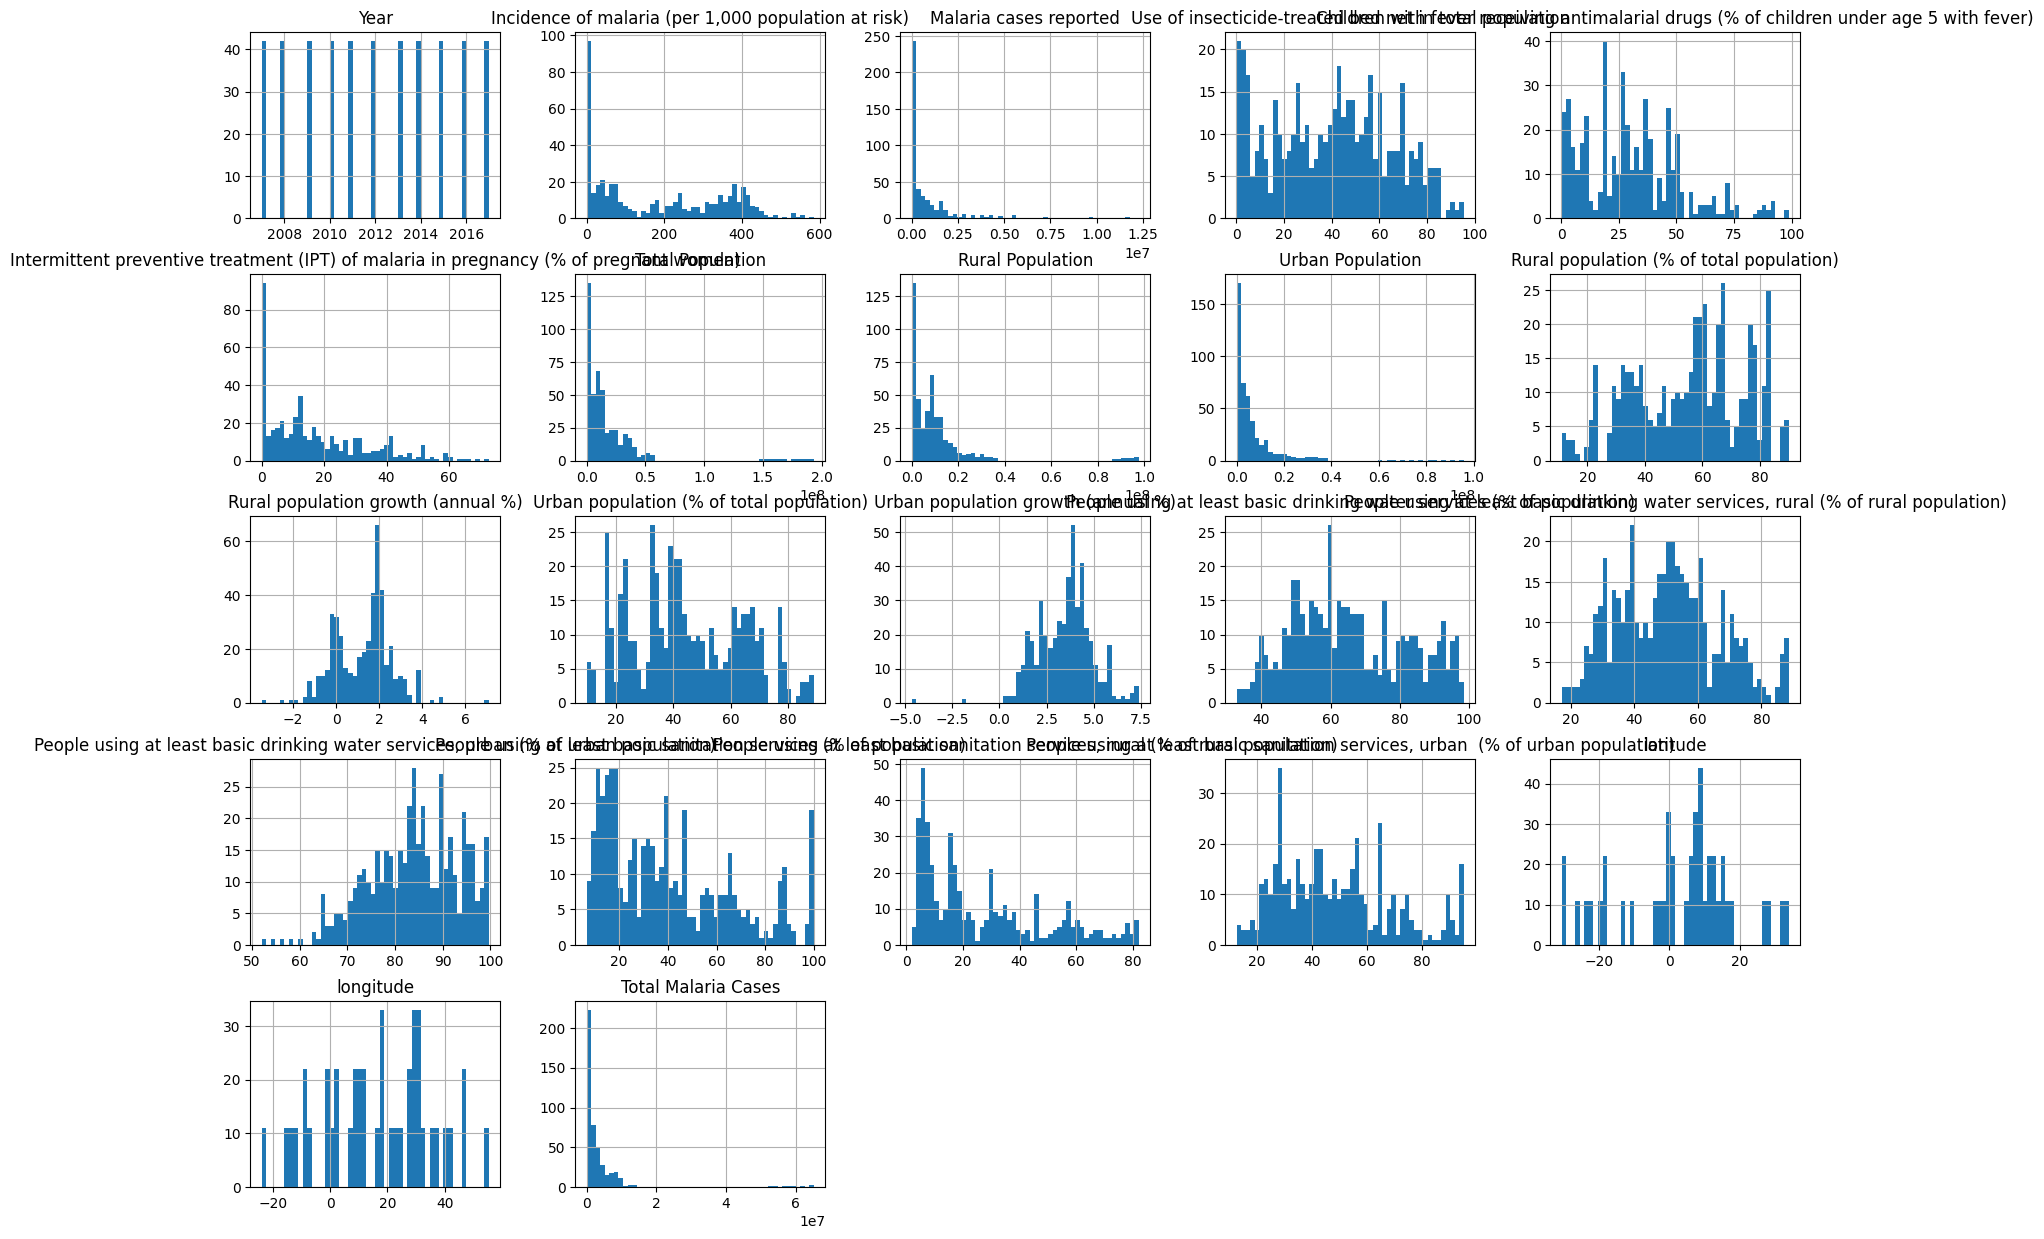

In [458]:
updated_df.hist(bins = 50, figsize = (20, 15))
plt.show()

In [459]:
#saving the cleaned_data
updated_df.to_csv('cleaned_data.csv', index=False)
updated_df.to_excel('cleaned_data.xlsx', index=False)

In [460]:

from google.colab import files

# Download the file
files.download('cleaned_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [461]:
files.download('cleaned_data.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>